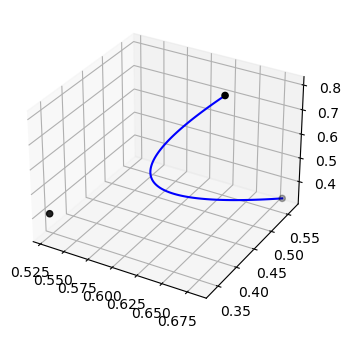

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#User Defined Variables
x = np.random.random_sample((3,)) # X-Coordinate Control Points
y = np.random.random_sample((3,)) # Y-Coordinate Control Points
z = np.random.random_sample((3,)) # Z-Coordinate Control Points

CELLS = 100 # Total Number of Divisions for Bezier Curve

# Other Variables
nCPTs = np.size(x, 0) # Total Number of Control Points
n = nCPTs - 1 # Total Number of Segments
i = 0 # Control Point Counter
t = np.linspace(0, 1, CELLS) # Parametric Variable
b = [] # Initialized Empty Matrix for Bernstein Basis Polynomial

# Initialized Empty Matrix for X, Y, Z, Bezier Curve
xBezier = np.zeros((1, CELLS))
yBezier = np.zeros((1, CELLS))
zBezier = np.zeros((1, CELLS))

# Binomial Coefficients
def Ni(n, i):
    return np.math.factorial(n) / (np.math.factorial(i) * np.math.factorial(n - i))

# Bernstein Basis Polynomial
def basisFunction(n, i, t):
    J = np.array(Ni(n, i) * (t ** i) * (1 - t) ** (n - i))
    return J

# Main Loop
for k in range(0, nCPTs):
    b.append(basisFunction(n, i, t))
    
    # Bezier Curve Calculation
    xBezier = basisFunction(n, i, t) * x[k] + xBezier
    yBezier = basisFunction(n, i, t) * y[k] + yBezier
    zBezier = basisFunction(n, i, t) * z[k] + zBezier
    i += 1

"""
# Plotting
# Bernstein Basis Polynomials
for line in b:
    plt.plot(t, line)
plt.show()
"""

# Bezier Curve
fig1 = plt.figure(figsize=(4, 4))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(x, y, z, c='black')
ax1.plot(xBezier[0], yBezier[0], zBezier[0], c='blue')
plt.show()